<a href="https://colab.research.google.com/github/easyforitall/FLOWER-CLASSIFICATION-USING-CNN/blob/main/FLOWER_DETECTION_USING_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import os
import PIL

In [ ]:
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 180s 1us/step


In [ ]:
data_dir

'.\\datasets\\flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [ ]:
daisy = list(data_dir.glob('daisy/*'))
daisy[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

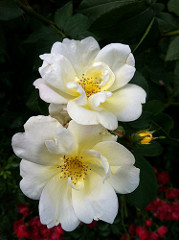

In [ ]:
PIL.Image.open(roses[0])

In [ ]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
flowers_images_dict.items()

dict_items([('roses', [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flowe

In [ ]:
X,y = [],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
X[:5]

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
len(X_train)

2752

In [ ]:
len(X_test)

918

In [ ]:
# scaling
X_train_scale = X_train/255
X_test_scale = X_test/255

MODEL BUILDING 

In [ ]:
num_classes = 5
model = Sequential([
    #cnn
    layers.Conv2D(filters = 16,kernel_size=(3,3),padding = 'same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 32,kernel_size=(3,3),padding = 'same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 64,kernel_size=(3,3),padding = 'same',activation='relu'),
    layers.MaxPooling2D(),
    # dense network
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scale,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 54s 615ms/step - loss: 1.5562 - accuracy: 0.3209
Epoch 2/10
86/86 [==============================] - 54s 627ms/step - loss: 1.1149 - accuracy: 0.5440
Epoch 3/10
86/86 [==============================] - 53s 612ms/step - loss: 0.9004 - accuracy: 0.6504
Epoch 4/10
86/86 [==============================] - 54s 631ms/step - loss: 0.7172 - accuracy: 0.7351
Epoch 5/10
86/86 [==============================] - 52s 604ms/step - loss: 0.5242 - accuracy: 0.8049
Epoch 6/10
86/86 [==============================] - 51s 597ms/step - loss: 0.3211 - accuracy: 0.8921
Epoch 7/10
86/86 [==============================] - 53s 614ms/step - loss: 0.1980 - accuracy: 0.9390
Epoch 8/10
86/86 [==============================] - 53s 618ms/step - loss: 0.1341 - accuracy: 0.9560
Epoch 9/10
86/86 [==============================] - 53s 616ms/step - loss: 0.0734 - accuracy: 0.9811
Epoch 10/10
86/86 [==============================] - 53s 618ms/step - loss: 0.0473 - accura

In [ ]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 6s 167ms/step - loss: 563.7197 - accuracy: 0.5183


[563.7197265625, 0.5183189511299133]

In [ ]:
predictions = model.predict(X_test_scale)

29/29 [==============================] - 6s 187ms/step


In [ ]:
score = [tf.nn.softmax(i) for i in predictions]

In [ ]:
y_predict = [np.argmax(i) for i in score]

In [ ]:
y_predict[:5]

[1, 0, 2, 0, 3]

In [ ]:
y_test[:5]

array([1, 0, 2, 4, 2])

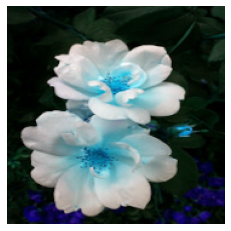

In [ ]:
plt.axis('off')
plt.imshow(X[0])

DATA AUGMENTATION

In [ ]:
data_augment = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

In [ ]:
data_augmentation1 = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.3),
])

In [ ]:
data_augmentation2 = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3),
])

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,
                                                                           180,
                                                                           3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

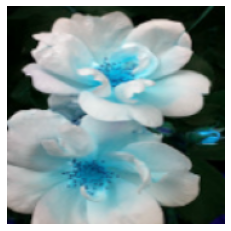

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

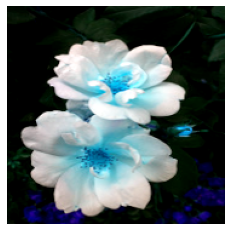

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation1(X)[0].numpy().astype('uint8'))

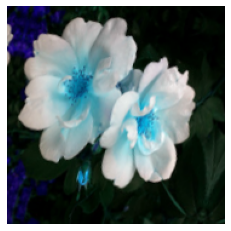

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation2(X)[0].numpy().astype('uint8'))

In [ ]:
num_classes = 5
model = Sequential([
    #cnn
    data_augmentation,
    layers.Conv2D(16,3,padding = 'same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    # dense network
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scale,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 56s 595ms/step - loss: 1.5280 - accuracy: 0.3583
Epoch 2/10
86/86 [==============================] - 51s 593ms/step - loss: 1.1275 - accuracy: 0.5342
Epoch 3/10
86/86 [==============================] - 50s 586ms/step - loss: 0.9883 - accuracy: 0.6170
Epoch 4/10
86/86 [==============================] - 50s 583ms/step - loss: 0.9399 - accuracy: 0.6403
Epoch 5/10
86/86 [==============================] - 50s 586ms/step - loss: 0.8539 - accuracy: 0.6748
Epoch 6/10
86/86 [==============================] - 51s 589ms/step - loss: 0.7817 - accuracy: 0.7024
Epoch 7/10
86/86 [==============================] - 51s 591ms/step - loss: 0.7408 - accuracy: 0.7206
Epoch 8/10
86/86 [==============================] - 51s 595ms/step - loss: 0.6989 - accuracy: 0.7315
Epoch 9/10
86/86 [==============================] - 50s 578ms/step - loss: 0.6493 - accuracy: 0.7489
Epoch 10/10
86/86 [==============================] - 49s 572ms/step - loss: 0.6210 - accura

In [ ]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 3s 99ms/step - loss: 279.9995 - accuracy: 0.5403


[279.99945068359375, 0.5403050184249878]